# Regresión KNN - Vecinos cercanos

La aproximación que estudiamos a continuación recibe el nombre de vecinos más cercanos (`KNN` de k nearest neighbors en inglés). Esta aproximación se basa en la premisa de que ejemplos similares en sus atributos presentan también un comportamiento similar en el valor de sus clases.

Aunque nos centremos en este algoritmo de aprendizaje automático para problemas de regresión, también puede ser aplicado tanto en clasificación como en problemas no supervisados.

La idea fundamental de la técnica de los vecinos más cercanos para regresión consiste en producir como predicción el promedio de las clases de los ejemplos de entrenamiento más parecidos (vecinos) al ejemplo de test que hay que predecir. Definiremos en este capítulo qué debe considerarse más parecido, aspecto que, como veremos, afecta a la eficacia del algoritmo.

>Note: El proceso de entrenamiento de KNN es muy sencillo, pues tan solo consiste en almacenar el conjunto de datos de entrenamiento, para poder ser consultado posteriormente en la fase de predicción. KNN no elabora ningún modelo a partir de los datos. Por esta razón, el proceso de entrenamiento apenas consume tiempo de ejecución.


Para llevar a cabo las predicciones, el algoritmo `KNN` clásico se basa en los dos siguientes elementos configurables:
el número `k` perteneciente a los Naturales de vecinos más cercanos y la función de distancia d (para poder evaluar la similitud
entre los ejemplos).


## Función de distancia

La función de distancia es un elemento crítico de `KNN` que afecta en gran medida a la bondad de las predicciones.

Cada problema puede requerir una función de distancia más adecuada a la naturaleza y distribución de los datos. En la mayoría de los casos, la distancia más utilizada es la euclídea.

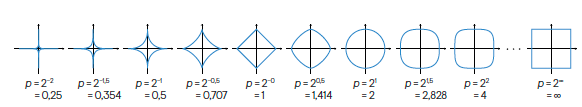

Distancia de Minkowski para diferentes valores de q. Por Waldir bajo licencia CC BY-SA 3.0. Recuperado de https://commons.wikimedia.org/wiki/File:2D_unit_balls.svg


## Propiedades

Cualquier función de distancia que se pretenda usar debería cumplir las cuatro siguientes propiedades
matemáticas:

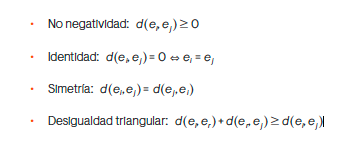


Una vez definidos todos estos elementos, la predicción de `KNN` se puede expresar mediante la siguiente
ecuación (siendo `v , ...,v1 k` los vecinos más cercanos de `ei`):

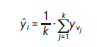

Tal como se aprecia en la anterior ecuación, la predicción `yt` resulta del promedio de las clases de los `k` vecinos más cercanos a `ei`. En la Figura se muestra un ejemplo con predicciones de `KNN` (estrellas de color azul) para tres ejemplos de test (estrellas de color verde) usando `k = 3` vecinos más cercanos. El conjunto de datos ilustrado en la Figura solo tiene un atributo (x):

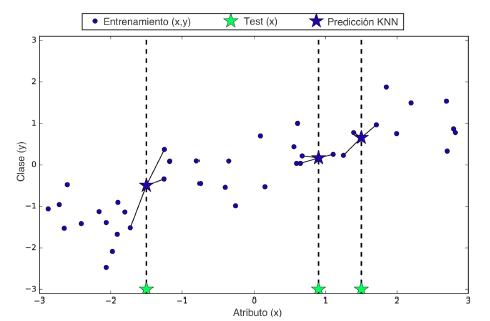


**Se recomienda lo siguiente para KNN:**

La escala de valores de los atributos. Los atributos cuyos valores son más altos contribuyen más al cálculo de los vecinos que los atributos con valores más bajos. Es necesario igualar las escalas de los atributos antes de utilizar el algoritmo KNN, para que las diferencias entre los valores de los atributos sean equiparables.


## Ventajas KNN

El algoritmo KNN de vecinos más cercanos posee una serie de ventajas e inconvenientes que es importante señalar. Las ventajas fundamentales que podríamos destacar son:

- La simplicidad del modelo. El modelo es tan simple que realmente no tiene modelo propio, tan solo los datos de entrenamiento.
- La fácil interpretabilidad de las predicciones. Las predicciones realizadas por el algoritmo KNN pueden ser fácilmente interpretadas si mostramos un resumen de los vecinos utilizados en la predicción.

## Desventajas KNN

Por otra parte, el algoritmo KNN posee ciertos inconvenientes:

- El tiempo de ejecución alto en la fase de predicción. Como hemos comentado anteriormente, para realizar la predicción a partir de un ejemplo de test, es preciso calcular las distancias a todos los ejemplos de entrenamiento, lo cual es el proceso más costoso del algoritmo. Este puede ser un importante hándicap cuando el conjunto de datos es enorme, con varios millones de instancias.

- La falta de generalización. Al no crearse ningún modelo a partir de los datos, si estos poseen anoma-lías, la eficacia del algoritmo puede verse afectada, especialmente con valores bajos de k. Además, si los datos están muy dispersos en el espacio de atributos o bien no son representativos, los errores de generalización del modelo pueden ser elevados.

- La necesidad de atributos relevantes y en igual escala. Tal como hemos comprobado en los ejemplos de este capítulo, la presencia de atributos en diferentes escalas puede afectar negativamente a los resultados. Además, los datos con una alta dimensionalidad (gran cantidad de atributos) deberían ser reducidos mediante una selección de los atributos más relevantes.


## Ejemplo

A continuación, mostramos en el Programa un ejemplo de aplicación del algoritmo `KNN` sobre el conjunto de datos “Boston”, utilizando `k = 10` vecinos más cercanos. Tal como hemos procedido en anteriores programas, se ha utilizado una validación cruzada con 5 bolsas y se han evaluado las métricas `MAE`, `RMSE`, `MAPE` y `R2`.

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model, metrics
from pprint import pprint
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split, KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carga de datos.
# dataset = datasets.load_boston()
# X = dataset.data
# y = dataset.target
# print(np.shape(X))

# Carga de datos.
datos = pd.read_csv('Boston.csv')
# datos = datasets.fetch_california_housing
# print(datos)
X = datos.drop(labels='medv', axis=1)
y = datos.medv

In [ ]:
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

### 1) PARTICIÓN EXTERNA DE DATOS

In [ ]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, 
                                                                test_size=0.2, 
                                                                random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

### 2-5) ENTRENAMIENTO

In [ ]:
# 2) Extracción de características
# 3) Selección de atributos

In [ ]:
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [ ]:
# 5) Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

In [ ]:
# 5.1) Validación cruzada interna

"""
cross_val_score: Nos permite obtener una sola métrica en regresión es el R2, por defecto obtener el coeficiente de determinación de las 5 bolsas.
cross_validate: Si quisiera más métricas, como las dada por un diccionario (MAE, MAPE, RMSE)
cross_val_predict: Si no quiero métricas, pero quiero sacar los valores de las predicciones, utilizo cross_val_predict

"""

# Extraer MEAN +- STD del coeficiente de determinación (R2) para un cross validation de 5 bolsas aleatorias y semilla en 42
r2_cv_results = cross_val_score(reg,X_stdr, 
                                y_training, 
                                cv=KFold(n_splits=5,shuffle=True,random_state=42))

print("cross_val_R2:   %0.4f +/- %0.4f" % (r2_cv_results.mean(), r2_cv_results.std()))

In [ ]:
# Extraer métricas MAE, MSE, RMSE y MAPE en un cross validation para 5 bolsas aleatorias y semilla en 42
metrics_cv_results = cross_validate(reg,
                                    X_stdr, 
                                    y_training, 
                                    cv=KFold(n_splits=5,shuffle=True,random_state=42),scoring=metricas)
pprint(metrics_cv_results)

In [ ]:
# Extraer las predicciones del cross validation de 5 bolsas aleatorias y semilla en 42
y_pred = cross_val_predict(reg,
                           X_stdr, 
                           y_training, 
                           cv=KFold(n_splits=5,shuffle=True,random_state=42))
print(y_pred)

In [ ]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz
def plot_bisectriz(y, y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.grid()
    plt.show()

# Visualiza la bisetriz
plot_bisectriz(y_training,y_pred)

In [ ]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_stdr, y_training)

### 6-10) PREDICCIÓN

In [ ]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 

In [ ]:
# 8) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [ ]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [ ]:
# 10) Evaluación del modelo sobre el conjunto de test
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

# Visualización de resultados
plot_bisectriz(y_testing, y_pred_test)

### ACTIVIDAD EXTRA

#### Entrenar el mejor modelo posible con el algoritmo KNN y comparar el resultado con el modelo OLS en test

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) es una técnica de validación cruzada incluida en el paquete de scikit learn. Lo que hace es ejecutarse a través de los diferentes parámetros que se introducen en la cuadrícula de parámetros y extraer los mejores valores y combinaciones de parámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Definir parámetros de búsqueda

"""
parámetros de KNN

"""

parameters = {'n_neighbors': range(10), 
             'weights': ('uniform','distance'), 
             'metric' : ('manhattan', 'euclidean'), 
             'algorithm' : ('ball_tree', 'kd_tree','auto')}

# Aplicar el algoritmo de búsqueda

reg = KNeighborsRegressor()
model = GridSearchCV(reg, parameters, scoring='r2') #aca puedo seleccionar otra métrica de scoring como MAE

# Entrenar el modelo

model.fit(X_stdr, y_training)

# Extraer los mejores parámetros

param=model.best_params_ #Selección de los mejores parámetros. Los guardo en una variable para utilizar luego.

display(model.best_params_) #Imprimimos

### Ball Tree

Para abordar las ineficiencias de los árboles KD en dimensiones superiores, se desarrolló la estructura de datos del `ball_tree`. Mientras que los árboles KD dividen los datos a lo largo de ejes cartesianos, los árboles de bolas dividen los datos en una serie de hiperesferas anidadas. Esto hace que la construcción del árbol sea más costosa que la del árbol KD, pero da como resultado una estructura de datos que puede ser muy eficiente en datos altamente estructurados, incluso en dimensiones muy altas.

### Eucliden vs Manhattan


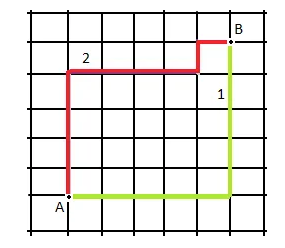

Usamos la distancia de `Manhattan`, también conocida como distancia de cuadra de la ciudad, o geometría de taxi si necesitamos calcular la distancia entre dos puntos de datos en una ruta similar a una cuadrícula.
En la imagen de arriba, imagine que cada celda es un edificio y las líneas de la cuadrícula son carreteras. Ahora si quiero viajar del Punto A al Punto B marcado en la imagen y seguir el camino rojo o amarillo. Vemos que el camino no es recto y hay curvas. En este caso, utilizamos la métrica de distancia de Manhattan para calcular la distancia recorrida.


La distancia `euclidiana` es la distancia en línea recta entre 2 puntos de datos en un plano.

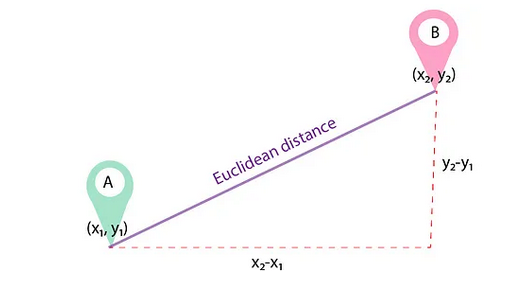


In [ ]:
# Entrenar cada algoritmo y comparar los resultados (a nivel cuantitativo y cualitativo) sobre el conjunto de test

algs = {}

algs ['OLS'] = linear_model.LinearRegression()
algs['KNN'] = KNeighborsRegressor(algorithm= param['algorithm'],
                                  metric= param['metric'],
                                  n_neighbors= param['n_neighbors'],
                                  weights= param['weights']) # Le paso los mejores parámetros anteriormente encontrados

for i, name in enumerate(algs):
    model = algs[name].fit(X_stdr, y_training)
    y_pred = model.predict(X_test_stdr)
    r2 = metrics.r2_score(y_testing, y_pred)
    print('R2: ' + name + ':' + str(np.round(r2,4)))
    
    #Visualizar Bisectriz
    plot_bisectriz(y_testing, y_pred)